In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.92461872 0.05306648]


In [2]:
x= np.arange(0,4,0.01)
y= np.exp(x)

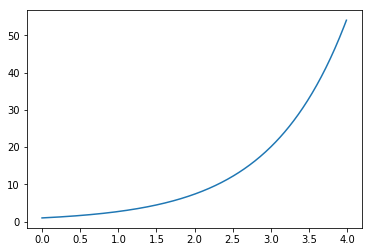

In [3]:
plt.plot(x,y)

In [4]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics.pairwise import euclidean_distances

In [5]:
circle = np.array([[x,np.exp(x)] for x in (np.random.rand(30)*2+1.5)])
X, Y = make_blobs(n_samples=15, centers=circle, n_features=2,
                 random_state=0,cluster_std =0.1)
r = np.random.uniform(-2,2,(200,2))
lr = (np.min(euclidean_distances(circle,r),axis = 0)>0.1)*1.
Xtrain = np.concatenate((r,X))
Ytrain = np.concatenate((lr,np.zeros(70))).astype(float)
Xtrain.shape,Ytrain.shape
Ytrain = Ytrain.reshape(-1,1)
Ytrain.shape
t = np.linspace(-2, 2,100, endpoint=False)
T = np.zeros((10100,2))
a=0
for i in t:
    for j in t:
        T[a]=np.array([i,j])
        a+=1
    a+=1

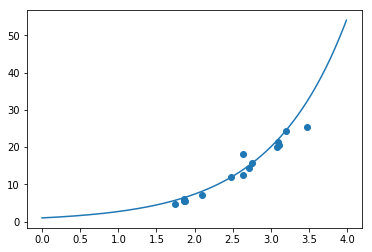

In [6]:
plt.scatter(X[:,0],X[:,1])
plt.plot(x,y)

plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.scatter(x,f1(x),alpha=.1,)
plt.scatter(x,f2(x))
plt.scatter(x,f3(x))
plt.ylim((-2,4))
plt.title('PCA of IRIS dataset')



plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

In [7]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch.nn.functional as F
from torch.utils.data.dataloader import DataLoader
from torch.optim.optimizer import Optimizer

In [8]:
torch.cuda.set_device(2)

In [9]:
class csvDataset():
    def __init__(self, data,label, transform=None):
        self.label = label
        self.data = data
        #self.train_set = TensorDataset()
        self.transform = transform
    def __len__(self):
        return len(self.data)
    def __getitem__(self, idx):
        data = self.data[idx]
        label = self.label[idx]
        sample = { 'data': data,'label': label}
        if self.transform:
            sample = self.transform(sample)
        return sample
    
class ToTensor(object):
    def __call__(self, sample):
        data, label= sample['data'],sample['label']
        return {'data': torch.from_numpy(data).float(),'label': torch.from_numpy(label).float()}

In [10]:
def train_model_cc_fast(model, trainloader,inference_loader, criterion, optimizer,size, num_epochs=25):
    train_accuracy = []
    for epoch in range(num_epochs):
        model.train(True)
        for i in trainloader:
            inputs = i['data']
            labels = i['label']
            inputs, labels = inputs.cuda(), labels.cuda()
            def closure():
                optimizer.zero_grad()
                logits = model.forward(inputs)
                loss = criterion(logits,labels)
                loss.backward()
                return loss
            loss = optimizer.step(closure)

        train_accuracy.append(accuracy(model, trainloader,size))

        
    return model, train_accuracy

In [11]:
def accuracy(model, dataloader,size):
    """ Computes the model's classification accuracy on the train dataset
    Computes classification accuracy and loss(optional) on the test dataset
    The model should return logits
    """
    model.eval()
    with torch.no_grad():
        error = 0.
        for i in (dataloader):
            inputs = i['data']
            labels = i['label']
            inputs, labels = inputs.cuda(), labels.cuda()
            pred = model(inputs).cpu().numpy()
            labels = labels.cpu().numpy()
            error+= (np.sum((pred-labels)**2))
            
    accuracy = error / size
    return accuracy

In [12]:

file_dataset = csvDataset(X[:,0].reshape(-1,1),X[:,1].reshape(-1,1),transform= ToTensor())
final_loader = torch.utils.data.DataLoader(file_dataset,batch_size=1 ,shuffle=True)

In [13]:
class nettt(nn.Module):
    def __init__(self,h):
        super(type(self), self).__init__()
        self.f1 = nn.Linear(1, h)
        self.f2 = nn.Linear(h, h)
        self.f3 = nn.Linear(h,  1)
    def forward(self, x):
        out = x
        out = F.relu(self.f1(out))
        out = F.relu(self.f2(out))
        out = self.f3(out)
        return out

In [14]:
torch.cuda.set_device(2)

In [15]:

model = nettt(256)
model = model.float().cuda()
optimizer = optim.Adam(model.parameters(), weight_decay=0)
criterion = F.mse_loss
model, error= train_model_cc_fast(model, final_loader,final_loader, criterion, optimizer,X[:,0].shape[0], num_epochs=100)

In [16]:
for a,i in model.named_parameters():
    print(a,i.shape)

f1.weight torch.Size([256, 1])
f1.bias torch.Size([256])
f2.weight torch.Size([256, 256])
f2.bias torch.Size([256])
f3.weight torch.Size([1, 256])
f3.bias torch.Size([1])


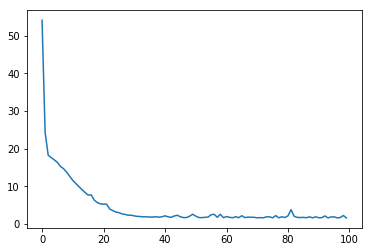

In [17]:
plt.plot(error)

In [18]:
xx = torch.from_numpy(x).float().cuda().reshape(-1,1)

In [19]:
ypred = model.forward(xx).cpu().detach().numpy()

In [20]:
ypredb=np.array([ypred[i+1] for i in range(399)])

(array([112.,   7.,   9.,   5.,   5.,   9.,  12.,  51.,  30., 159.]),
 array([-0.00040307,  0.01302358,  0.02645024,  0.03987689,  0.05330354,
         0.06673019,  0.08015684,  0.09358349,  0.10701015,  0.1204368 ,
         0.13386345], dtype=float32),
 <a list of 10 Patch objects>)

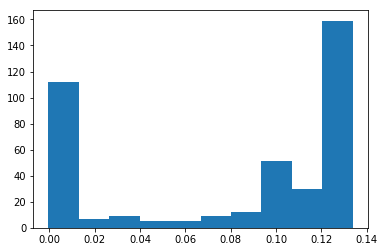

In [21]:
plt.hist(ypredb-ypred[:399])

In [22]:
def f(x):
    return np.amax((0,7*x-6,17*x-31))

In [23]:
import seaborn as sns

In [24]:
sns.set()

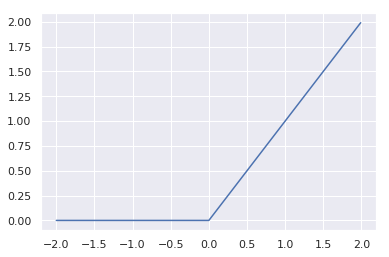

In [25]:
plt.plot(x-2,np.maximum(0,x-2))

In [50]:
yy= np.array([f(0.01*i) for i in range(400)])
y1= np.array([0.01*i*0+0.1 for i in range(400)])
y2= np.array([0.01*i*7-6 for i in range(400)])
y3= np.array([0.01*i*17-31 for i in range(400)])


In [51]:
a=[6/7,25/10]
b=[0+0.1,7*25/10-6+0.1]

(-10, 30)

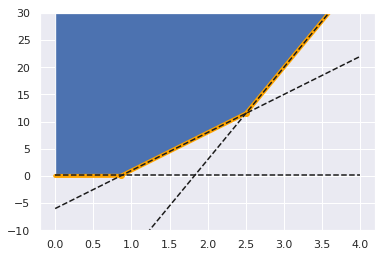

In [66]:
#plt.scatter(X[:,0],X[:,1])
#plt.plot(x,y)
#plt.plot(x[:370],y[:370],'k--')
plt.scatter(a,b,color='orange')
plt.plot(x,yy,color='orange',lw=4)
plt.plot(x,y1,'k--')
plt.plot(x,y2,'k--')
plt.plot(x,y3,'k--')
plt.fill_between(x,40,yy)
plt.ylim(-10,30)

In [29]:
for i in model.named_parameters():
    print(i)

('f1.weight', Parameter containing:
tensor([[-0.7947],
        [ 0.9838],
        [ 0.3175],
        [ 0.4564],
        [ 0.6098],
        [-0.5931],
        [-0.2096],
        [-0.8323],
        [-0.7350],
        [-0.4630],
        [ 0.2010],
        [ 0.8110],
        [ 0.8200],
        [ 0.6592],
        [ 1.0000],
        [ 0.2429],
        [-0.0685],
        [ 0.0226],
        [-0.1945],
        [-0.2693],
        [-0.2641],
        [-0.2962],
        [-0.4278],
        [ 0.5148],
        [-0.9886],
        [-0.5017],
        [-0.9996],
        [-0.1535],
        [ 0.6564],
        [ 0.3153],
        [ 0.9563],
        [-0.6274],
        [ 0.0946],
        [-0.1167],
        [-0.3181],
        [-0.8312],
        [ 0.1093],
        [-0.8458],
        [ 0.0785],
        [-0.8423],
        [-0.8512],
        [-0.7371],
        [-0.5811],
        [-0.0376],
        [-0.7363],
        [-0.2603],
        [ 0.2605],
        [ 0.7044],
        [-0.4497],
        [ 0.7772],
        [ 0.91

In [30]:
Xs = np.sort(X,axis=0)
Xs.shape

(15, 2)

In [31]:
Xs[:2,0]

array([1.73797669, 1.85860514])

In [32]:
files_dataset = csvDataset(Xs[:,0].reshape(-1,1),Xs[:,1].reshape(-1,1),transform= ToTensor())
finals_loader = torch.utils.data.DataLoader(files_dataset,batch_size=1 ,shuffle=False)

In [33]:
class Maxout(nn.Module):

    def __init__(self, d_in, d_out, pool_size):
        super().__init__()
        self.d_in, self.d_out, self.pool_size = d_in, d_out, pool_size
        self.lin = nn.Linear(d_in, d_out * pool_size)


    def forward(self, inputs):
        shape = list(inputs.size())
        shape[-1] = self.d_out
        shape.append(self.pool_size)
        max_dim = len(shape) - 1
        out = self.lin(inputs)
        out = out.view(*shape)
        
        a = np.random.rand(self.pool_size)
        for i in range(self.pool_size):
            if a[i]>1:
                out[:,:,i]=-20
        
        if inputs<2:
            out[:,:,1:]=-20
                
        elif (inputs < 3):
            out[:,:,0]=-20
            out[:,:,2]=-20
                
        else:
            out[:,:,:2]=-20
                
        m, i = out.max(max_dim)
        return m
    
class maxout_Net(nn.Module):
    def __init__(self,h,n):
        super(type(self), self).__init__()
        self.f1 = Maxout(h, h, n)
    def forward(self, x):
        out = x
        out = self.f1(out)
        return out

In [34]:
model = maxout_Net(1,3)
model = model.float().cuda()
optimizer = optim.Adam(model.parameters(), weight_decay=0)
criterion = F.mse_loss



model, error= train_model_cc_fast(model, finals_loader,finals_loader, criterion, optimizer,X[:,0].shape[0], num_epochs=1000)

In [35]:
ypred = [model.forward(xx[i].reshape(1,1)).cpu().detach().numpy() for i in range(xx.shape[0])]
ypred=np.array(ypred).reshape(400)

In [36]:
ypred.shape

(400,)

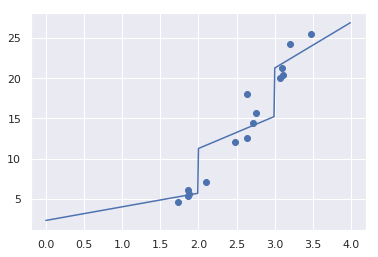

In [37]:
plt.scatter(X[:,0],X[:,1])
#plt.plot(x,y)
plt.plot(x,ypred)

In [38]:
for i in model.named_parameters():
    print(i)

('f1.lin.weight', Parameter containing:
tensor([[ 1.6933],
        [ 3.9987],
        [ 5.6836]], device='cuda:2'))
('f1.lin.bias', Parameter containing:
tensor([ 2.3219,  3.2676,  4.2207], device='cuda:2'))


In [39]:
ypred[350],x[350],3.5*4.9175+4.656

(24.113276, 3.5, 21.86725)

In [40]:
ypred[250],x[250],2.5*3.6955+3.655

(13.264369, 2.5, 12.893749999999999)